## Bayes Theorem 
#### Bayes’ Theorem is a way to update probabilities based on new evidence.

#### Below we demonstrate the importance of Bayes's Theorem in medical testing and college admissions. 

## Medical testing for a rare disease
#### When testing for a rare disease, false positives can be quite common and may not mean a person has the disease. 

Population with disease: 95
Population without disease/healthy: 9905
True positives: 92
False negatives (missed cases): 3
True negatives: 8926
False positives (healthy people testing positive): 979
Chance of actually having the disease given a positive test: 8.59%


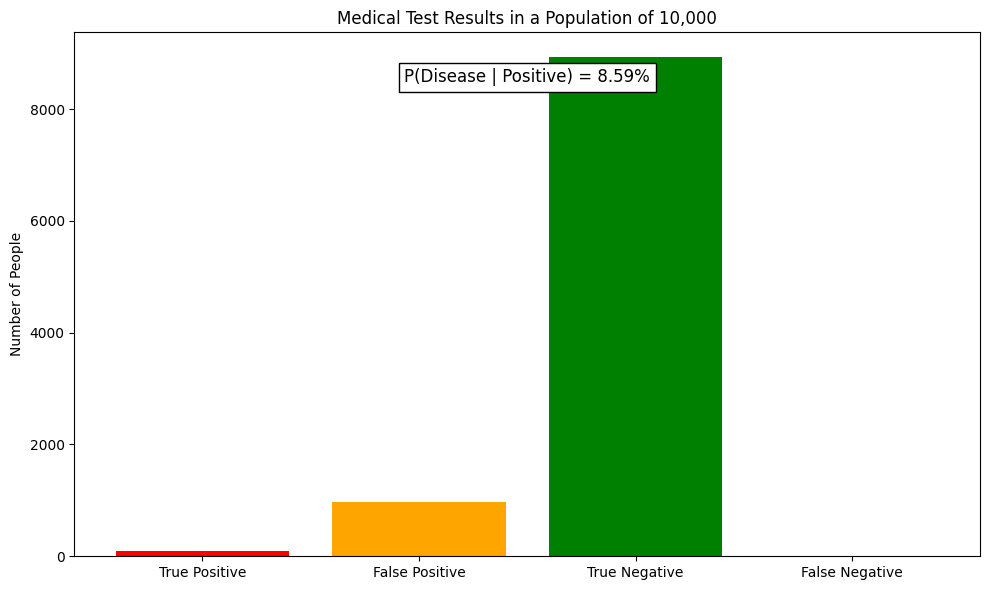

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# -------------------------------
# Parameters
# -------------------------------
population_size = 10000
disease_prevalence = 0.01   # 1% of population has the disease
sensitivity = 0.97          # True positive rate i.e. those with the disease who will test positive
specificity = 0.90          # True negative rate i.e. those without the disease who will test negative
# -------------------------------
# Simulate Population
# -------------------------------
# Determine who has the disease
has_disease = np.random.rand(population_size) < disease_prevalence
no_disease = ~has_disease
print("Population with disease:", np.sum(has_disease))
print("Population without disease/healthy:", np.sum(no_disease))

# Test results for those with disease
true_positives = has_disease & (np.random.rand(population_size) < sensitivity)
false_negatives = has_disease & ~true_positives
print("True positives:", np.sum(true_positives))
print("False negatives (missed cases):", np.sum(false_negatives))

# Test results for those without disease
true_negatives = no_disease & (np.random.rand(population_size) < specificity)
false_positives = no_disease & ~true_negatives
print("True negatives:", np.sum(true_negatives))
print("False positives (healthy people testing positive):", np.sum(false_positives))

# -------------------------------
# Count Outcomes
# -------------------------------
tp = np.sum(true_positives)
fn = np.sum(false_negatives)
tn = np.sum(true_negatives)
fp = np.sum(false_positives)

# -------------------------------
# Apply Bayes' Theorem
# -------------------------------
# P(Disease | Positive Test) = TP / (TP + FP)
posterior_prob = tp / (tp + fp)
print(f"Chance of actually having the disease given a positive test: {posterior_prob:.2%}")

# -------------------------------
# Visualization
# -------------------------------
labels = ['True Positive', 'False Positive', 'True Negative', 'False Negative']
sizes = [tp, fp, tn, fn]
colors = ['red', 'orange', 'green', 'blue']

plt.figure(figsize=(10, 6))
plt.title('Medical Test Results in a Population of 10,000')
plt.bar(labels, sizes, color=colors)
plt.ylabel('Number of People')

# Show posterior probability as text
plt.text(1.5, max(sizes)*0.95, f"P(Disease | Positive) = {posterior_prob:.2%}", 
         fontsize=12, ha='center', bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()


## College Admissions
#### Even with a high GPA, chanced of being admitted to a competitive college can still be small.

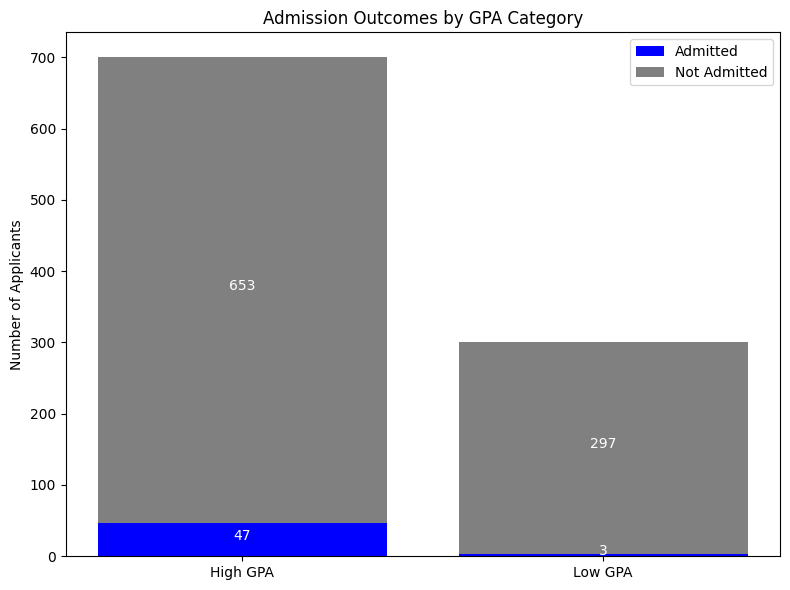

Total applicants: 1000
High GPA applicants: 700
High GPA admitted: 47
P(Admitted | High GPA) = 0.0671 or 6.71%


In [10]:
import matplotlib.pyplot as plt

# -------------------------------
# Parameters
# -------------------------------
total_applicants = 1000
overall_admission_rate = 0.05     # 5% of applicants are admitted
high_gpa_applicant_pct = 0.70     # 70% of applicants have high GPA
high_gpa_admit_pct = 0.95         # 95% of admitted students have high GPA

# -------------------------------
# Derived Counts
# -------------------------------
num_admitted = int(total_applicants * overall_admission_rate)             
num_high_gpa_applicants = int(total_applicants * high_gpa_applicant_pct)  
num_low_gpa_applicants = total_applicants - num_high_gpa_applicants       
num_high_gpa_admits = int(num_admitted * high_gpa_admit_pct)              
num_low_gpa_admits = num_admitted - num_high_gpa_admits                   

num_high_gpa_not_admitted = num_high_gpa_applicants - num_high_gpa_admits
num_low_gpa_not_admitted = num_low_gpa_applicants - num_low_gpa_admits

# -------------------------------
# Bar Chart: GPA Categories Split by Admission
# -------------------------------
categories = ['High GPA', 'Low GPA']
admitted = [num_high_gpa_admits, num_low_gpa_admits]
not_admitted = [num_high_gpa_not_admitted, num_low_gpa_not_admitted]

x = range(len(categories))

plt.figure(figsize=(8, 6))
plt.bar(x, admitted, color='blue', label='Admitted')
plt.bar(x, not_admitted, bottom=admitted, color='gray', label='Not Admitted')

plt.xticks(x, categories)
plt.ylabel('Number of Applicants')
plt.title('Admission Outcomes by GPA Category')
plt.legend()

# Annotate bar segments
for i in range(len(categories)):
    plt.text(i, admitted[i] / 2, str(admitted[i]), ha='center', color='white', fontsize=10)
    plt.text(i, admitted[i] + not_admitted[i] / 2, str(not_admitted[i]), ha='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()

# -------------------------------
# GPA Admission Rates
# -------------------------------
#Derived values
num_high_gpa_applicants = int(total_applicants * high_gpa_applicant_pct) 
num_admitted = int(total_applicants * overall_admission_rate)            
num_high_gpa_admitted = int(num_admitted * high_gpa_admit_pct)            
# Compute probability
p_admit_given_high_gpa = num_high_gpa_admitted / num_high_gpa_applicants

# Output
print("Total applicants:", total_applicants)
print("High GPA applicants:", num_high_gpa_applicants)
print("High GPA admitted:", num_high_gpa_admitted)
print(f"P(Admitted | High GPA) = {p_admit_given_high_gpa:.4f} or {p_admit_given_high_gpa:.2%}")
